In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('../mf/all-equity-excluding-sector-funds-2023.xlsx', skiprows=5, index_col=0)

In [4]:
df['Category'].unique()

array(['EQ-ELSS', 'EQ-FLX', 'EQ-L&MC', 'EQ-LC', 'EQ-MC', 'EQ-MLC',
       'EQ-SC', 'EQ-VAL'], dtype=object)

Categories

1. equity-large-cap - EQ-LC
2. equity-large-and-midcap - EQ-L&MC
3. equity-flexi-cap - EQ-FLX
4. equity-multi-cap - EQ-MLC
5. equity-value - EQ-VAL
6. equity-elss - EQ-ELSS
7. equity-mid-cap - EQ-MC
8. equity-small-cap - EQ-SC

Returns are from year 2014 to 2022.

In [5]:
file = df[df['Category'] == 'EQ-MLC']

In [6]:
def mf_selector(file, year_from, year_to, threshold=3, percentile=50):
    """
        file: file
        years_from, years_to: select between 2014 to 2021
    """
    
#     df = pd.read_excel(file, skiprows=5, index_col=0)
#     df = df[df['Category'] == category]
    df = file
    # df = df.apply(lambda c : pd.to_numeric(c, errors='coerce'))
    df = df.loc[:, [i for i in range(year_from, year_to+1)]].dropna(thresh=threshold)

    
    dfdr = df.rank(axis=0, ascending = True)/df.count()
    
    # Funds within given percentile
    top_percentile = (dfdr[dfdr>=(percentile/100)].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)
    top_percentile.name = 'top_percentile'
    
    # average percentage rank
    dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)
    average_rank = dfdr.sort_values(by='rank')['rank']
    
    # alpha
    dfdm = df-df.mean()
    alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
    alpha.name = 'alpha'
    
    # Ergodicity
    scaled_df = pd.DataFrame(np.round(StandardScaler(with_mean=False).fit_transform(df.to_numpy()), 3), index=df.index, columns=df.columns)
    ergodic = (scaled_df[scaled_df>0].sum(axis=1).add(2*scaled_df[scaled_df<0].sum(axis=1))/df.count(axis=1)).sort_values(ascending=False)
    ergodic.name = 'ergodic'
    
    result = top_percentile.to_frame().join(average_rank).join(ergodic).join(alpha)
    result = result.sort_values(by=['ergodic'], ascending=False)
    # return df
    return result.join(df)

In [7]:
result = mf_selector(file, year_from=2020, year_to=2023, threshold=3, percentile=50)
result

,top_percentile,rank,ergodic,alpha,2020,2021,2022,2023
Funds,,,,,,,,
Quant Active Fund - Direct Plan,0.75,0.75000,4.34925,10.4550,44.93,58.68,12.09,26.30
Nippon India Multi Cap Fund - Direct Plan,0.75,0.68750,4.13025,1.1450,0.77,49.87,14.97,39.15
Mahindra Manulife Multi Cap Fund - Direct Plan,1.00,0.68750,3.90325,2.9775,18.67,53.51,3.51,36.40
ICICI Prudential Multicap Fund - Direct Plan,0.50,0.53125,3.45550,-2.5500,10.27,37.62,5.61,36.48
Invesco India Multicap Fund - Direct Plan,0.50,0.50000,3.27750,-1.1425,20.39,42.54,-0.84,33.52
ITI Multi Cap Fund - Direct Plan,0.50,0.50000,3.20050,-6.9775,4.31,21.85,4.97,41.14
Baroda BNP Paribas Multi Cap Fund - Direct Plan,0.50,0.40625,3.20000,-1.5225,16.86,46.07,-0.97,32.13
Sundaram Multi Cap Fund - Direct Plan,0.50,0.43750,3.17750,-2.3850,14.98,43.49,-0.39,32.56


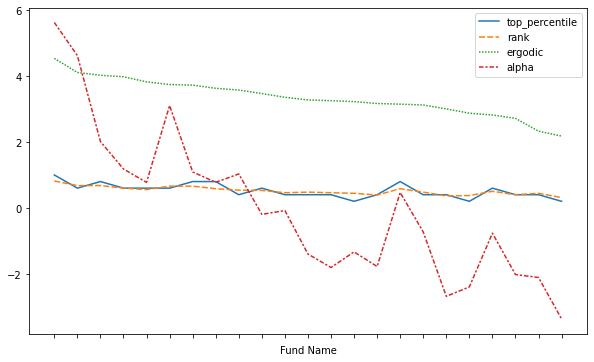

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=result.iloc[:, :4], sort=False)
plt.xticks(np.arange(len(result)), [])
plt.show()

correlation between ergodic value and returns

In [61]:
df1 = mf_selector(df[df['Category'] == 'EQ-FLX'], year_from=2017, year_to=2020, percentile=50)
df1

,top_percentile,rank,ergodic,alpha,2017,2018,2019,2020
Fund Name,,,,,,,,
Axis Focused 25 Fund - Direct Plan,1.000000,0.883576,3.162500,6.541431,46.86,1.83,16.20,22.48
UTI Flexi Cap Fund - Direct Plan,0.750000,0.682259,2.900250,4.571431,30.69,4.05,12.30,32.45
Parag Parikh Flexi Cap Fund - Direct Plan,0.750000,0.704002,2.848250,4.486431,30.10,0.16,15.34,33.55
Canara Robeco Flexi Cap Fund - Direct Plan,1.000000,0.763687,2.791500,4.073931,38.70,1.54,13.40,23.86
Axis Flexi Cap Fund - Direct Plan,1.000000,0.905983,2.774333,8.268034,NaN,8.79,19.04,21.08
IIFL Focused Equity Fund - Direct Plan,0.500000,0.637734,2.695500,4.983931,31.72,-5.33,29.23,25.52
SBI Focused Equity Fund - Direct Plan,0.750000,0.716563,2.552500,3.733931,45.98,-2.77,17.18,15.75
PGIM India Flexi Cap Fund - Direct Plan,0.750000,0.622315,2.486500,5.516431,38.58,-5.93,12.08,38.54
Tata Retirement Savings Fund - Progressive Plan - Direct Plan,0.500000,0.647089,2.332250,3.671431,50.99,-4.89,13.54,16.25


In [62]:
df2 = df[df['Category'] == 'EQ-FLX'].apply(lambda c : pd.to_numeric(c, errors='coerce'))

In [67]:
df2.loc[df1.index, 2021].sort_values(ascending=False)

Fund Name
Parag Parikh Flexi Cap Fund - Direct Plan                              46.97
PGIM India Flexi Cap Fund - Direct Plan                                46.45
SBI Focused Equity Fund - Direct Plan                                  44.53
HDFC Retirement Savings Fund Equity Plan - Direct Plan                 44.27
HDFC Focused 30 Fund - Direct Plan                                     41.78
Franklin India Flexi Cap Fund - Direct Plan                            41.32
Franklin India Focused Equity Fund - Direct Plan                       40.53
IDBI Flexi Cap Fund - Direct Plan                                      38.44
Union Flexi Cap Fund - Direct Plan                                     38.27
IIFL Focused Equity Fund - Direct Plan                                 37.91
ICICI Prudential Focused Equity Fund - Direct Plan                     37.81
Nippon India Focused Equity Fund - Direct Plan                         37.47
Edelweiss Flexi Cap Fund - Direct Plan                            

In [64]:
df1['ergodic'].corr(df2.loc[df1.index, 2021])

0.21339461720331707

<AxesSubplot:xlabel='ergodic', ylabel='2021'>

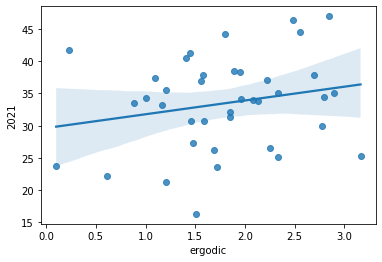

In [65]:
sns.regplot(x=df1['ergodic'], y=df2.loc[df1.index, 2021])